## Test level 2

### Test level 3

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os

# Ajouter la racine du projet au sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../..')))

# Importer les fonctions du package utils
from utils.map import map_variable, load_variable

## Damages by model

### FUND model

The FUND model represents many damages. 

#### Monetary lossses

##### Agriculture

c:\Users\gabriel.genelot\AppData\Local\Programs\Python\Python312\Lib\site-packages\xarray\backends\plugins.py:80: RuntimeWarning: Engine 'cfgrib' loading failed:
Cannot find the ecCodes library
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


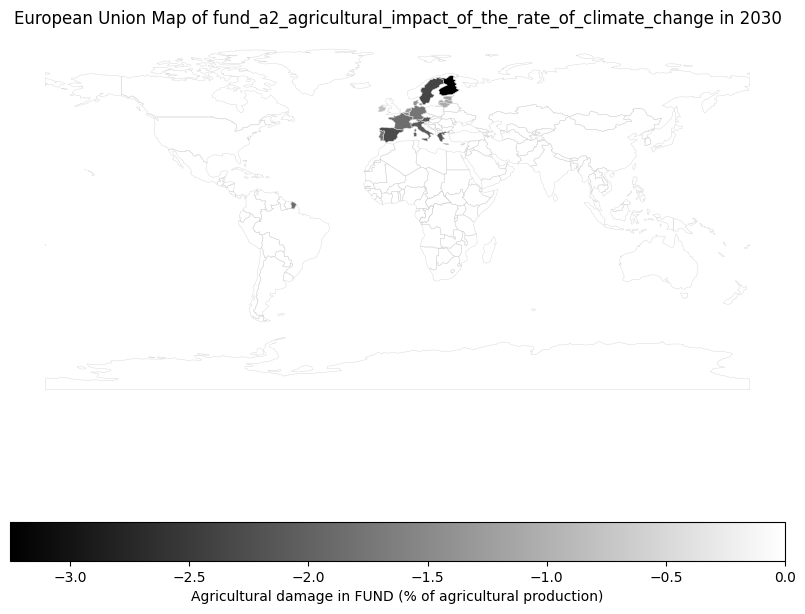

In [2]:
# Multiply the fraction of output by the valuation of the agricultural production 

agriculture = load_variable("fund_a2_agricultural_impact_of_the_rate_of_climate_change")
map_variable(agriculture, 2030, False, 'grey', boundary_linewidth=0.3)

In [3]:
agriculture

,time,REGIONS 35 I,fund_a2_agricultural_impact_of_the_rate_of_climate_change
0,2005.0,AUSTRIA,-26.416754
1,2005.0,BELGIUM,-18.788371
2,2005.0,BULGARIA,0.000000
3,2005.0,CROATIA,0.000000
4,2005.0,CYPRUS,-17.404359
...,...,...,...
1955,2060.0,INDIA,0.000000
1956,2060.0,LATAM,0.000000
1957,2060.0,RUSSIA,0.000000
1958,2060.0,USMCA,0.000000


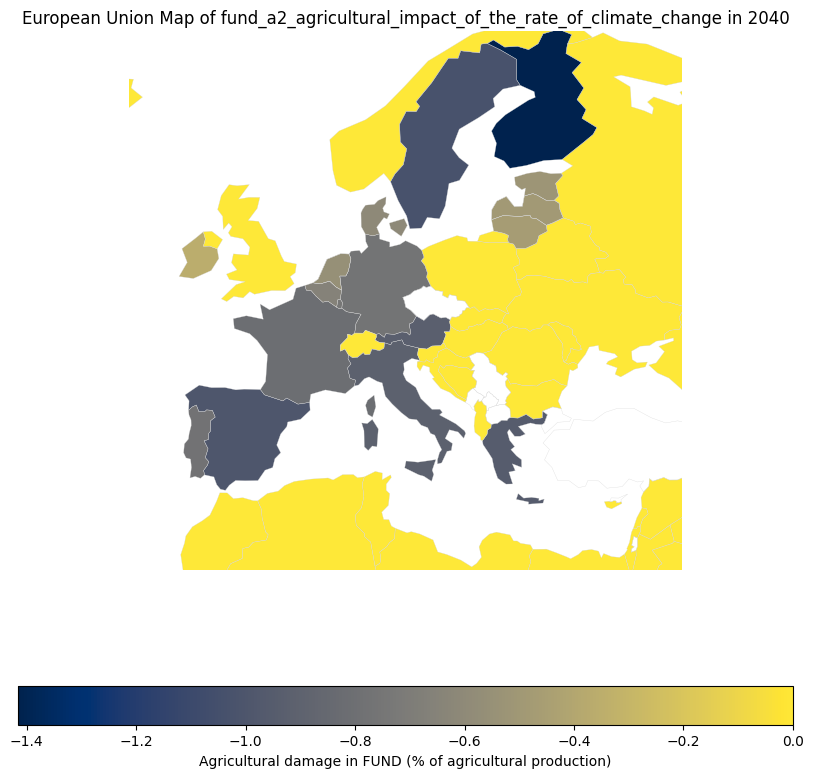

In [4]:
map_variable(agriculture, 2040, 'gray')

##### Direct monetary impacts 

##### Forestry impact



In [5]:
forestry = load_variable_data_from_ds("fund_f1_forestry_change_in_consumer_and_producer_surplus")
forestry

NameError: name 'load_variable_data_from_ds' is not defined

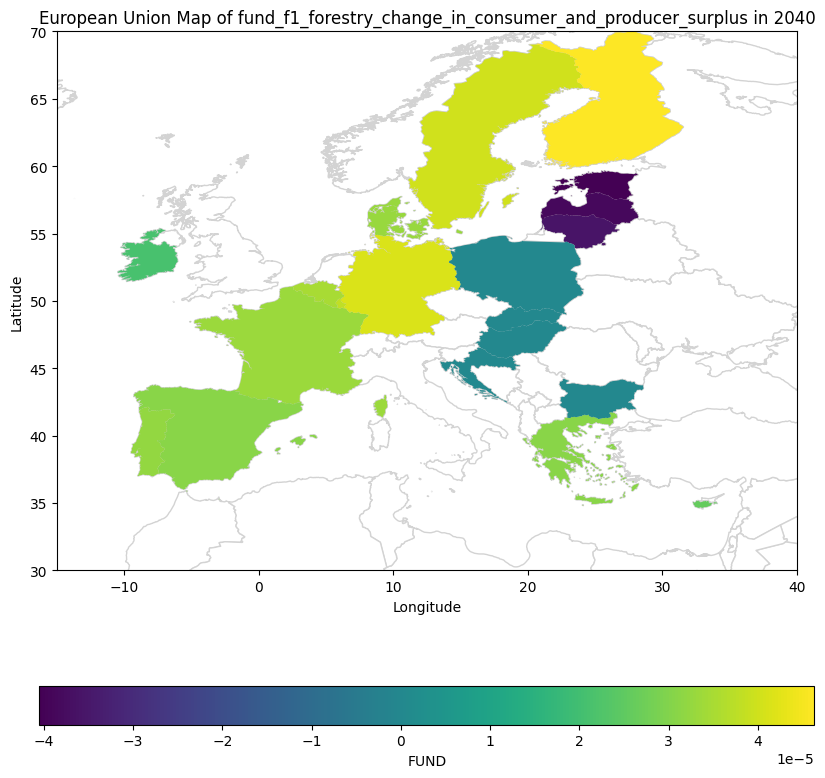

In [ ]:
map_variable(forestry, 2040)

##### Water ressources impact

In [ ]:
water = load_variable_data_from_ds("fund_w1_change_in_water_resources")
water

,time,REGIONS 35 I,fund_w1_change_in_water_resources
0,2005.0,AUSTRIA,NaN
1,2005.0,BELGIUM,-105.899594
2,2005.0,BULGARIA,0.000000
3,2005.0,CROATIA,0.000000
4,2005.0,CYPRUS,-4.506037
...,...,...,...
1955,2060.0,INDIA,0.000000
1956,2060.0,LATAM,0.000000
1957,2060.0,RUSSIA,0.000000
1958,2060.0,USMCA,0.000000


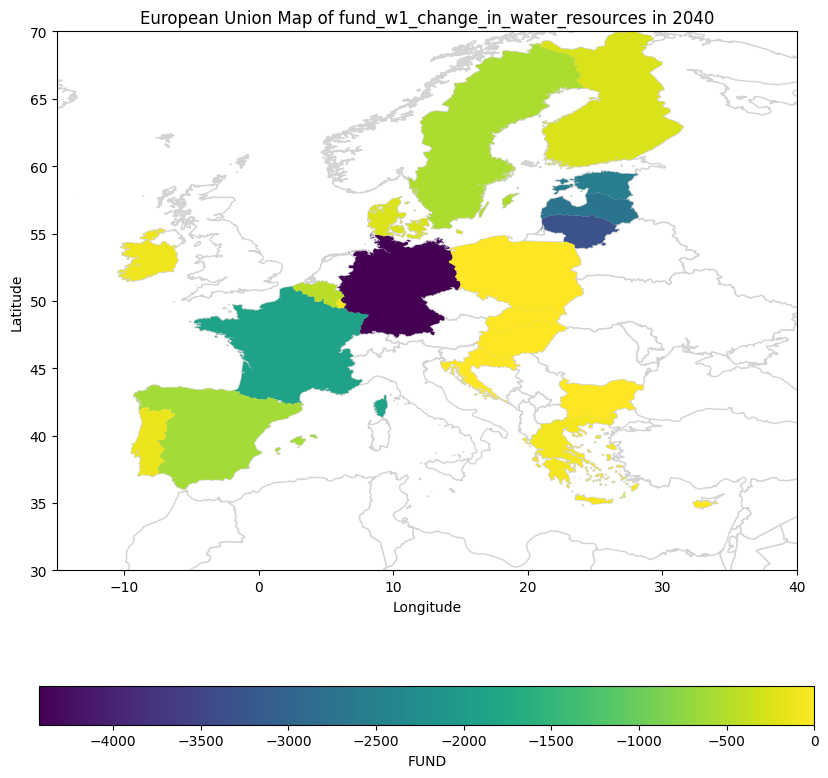

In [ ]:
map_variable(water, 2040)

In [ ]:
forestryAndWater = forestry + water
forestryAndWater

,REGIONS 35 I,fund_f1_forestry_change_in_consumer_and_producer_surplus,fund_w1_change_in_water_resources,time
0,AUSTRIAAUSTRIA,NaN,NaN,4010.0
1,BELGIUMBELGIUM,NaN,NaN,4010.0
2,BULGARIABULGARIA,NaN,NaN,4010.0
3,CROATIACROATIA,NaN,NaN,4010.0
4,CYPRUSCYPRUS,NaN,NaN,4010.0
...,...,...,...,...
1955,INDIAINDIA,NaN,NaN,4120.0
1956,LATAMLATAM,NaN,NaN,4120.0
1957,RUSSIARUSSIA,NaN,NaN,4120.0
1958,USMCAUSMCA,NaN,NaN,4120.0


##### Energy consumptoin impact

#### Material losses

##### Sea level rise and the loss of land

##### Ecosystems loss

#### Human health impact

##### Diarrhoea

##### Vector-borne diseases

##### Cardiovascular and respiratory mortality

#### Extreme weather

##### Tropical storm

##### Extra-tropical storm

#### Mortality

#### Total impact

In [ ]:
monetary = load_variable_data_from_ds("fund_tot_eq_moneraty_impact", 'results_run_2030.nc')
monetary

,time,REGIONS 35 I,fund_tot_eq_moneraty_impact
0,2005.0,AUSTRIA,NaN
1,2005.0,BELGIUM,1.379671e+09
2,2005.0,BULGARIA,2.799410e+08
3,2005.0,CROATIA,2.565073e+08
4,2005.0,CYPRUS,9.993271e+07
...,...,...,...
905,2030.0,INDIA,1.654518e+10
906,2030.0,LATAM,2.573583e+10
907,2030.0,RUSSIA,1.355983e+10
908,2030.0,USMCA,9.004928e+10


<Axes: xlabel='time', ylabel='fund_tot_eq_moneraty_impact'>

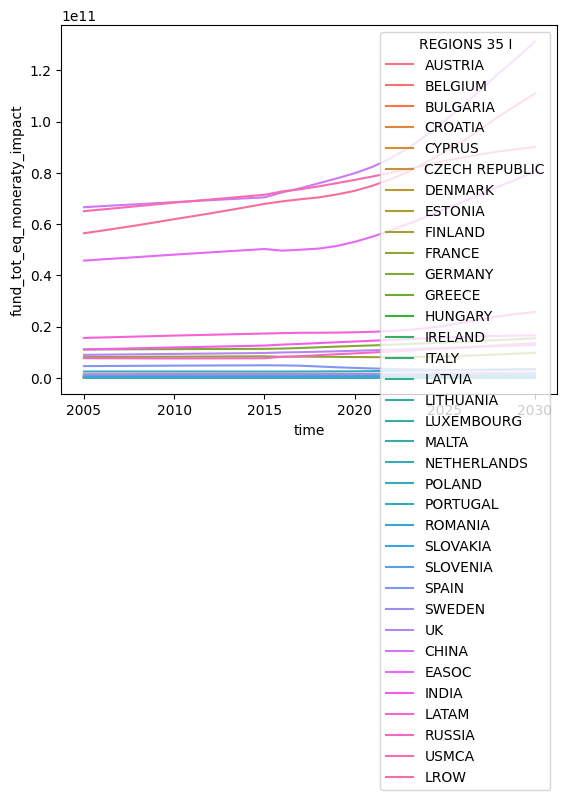

In [ ]:
sns.lineplot(data=monetary, 
             x='time', 
             y= 'fund_tot_eq_moneraty_impact',
             hue = 'REGIONS 35 I')

<Axes: xlabel='time', ylabel='fund_tot_eq_moneraty_impact'>

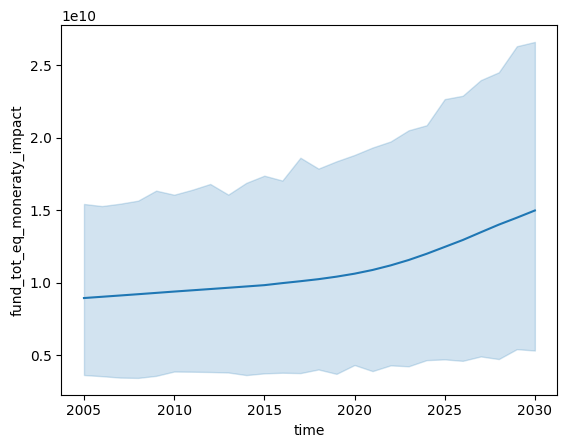

In [ ]:
monetary_global = monetary.groupby(['time', 'REGIONS 35 I']).sum()

sns.lineplot(
    data=monetary_global, 
    x = 'time', 
    y = 'fund_tot_eq_moneraty_impact'
)

<Axes: xlabel='time'>

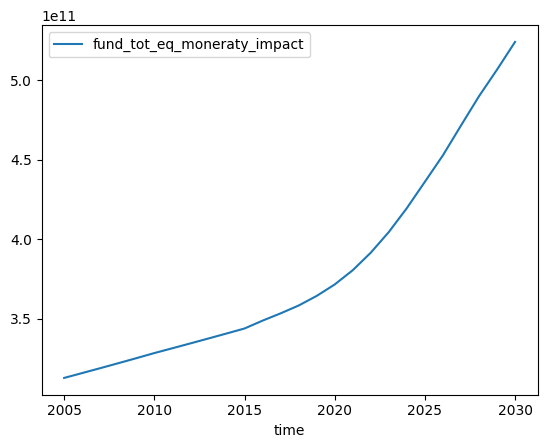

In [ ]:
monetary_global= monetary.groupby('time')['fund_tot_eq_moneraty_impact'].sum().reset_index()
monetary_global.plot(x='time')

#### Mortality

In [ ]:
mortality = load_variable_data_from_ds("fund_tot_eq_total_deaths", 'results_run_2030.nc')
mortality_global = mortality.groupby('time')['fund_tot_eq_total_deaths'].sum().reset_index()

<Axes: xlabel='time', ylabel='fund_tot_eq_total_deaths'>

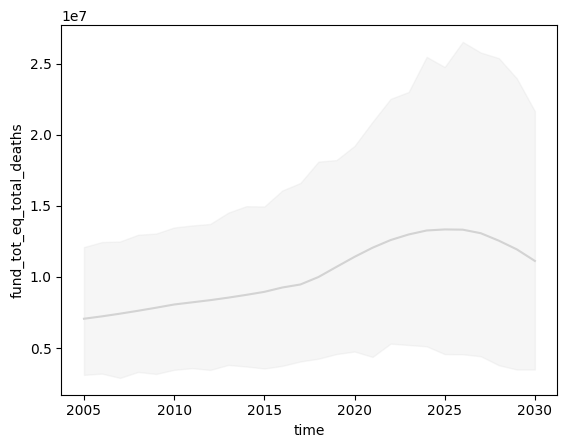

In [ ]:
sns.lineplot(data=mortality, 
             x='time', 
             y= 'fund_tot_eq_total_deaths', 
             color='lightgray')

<Axes: xlabel='time', ylabel='fund_tot_eq_total_deaths'>

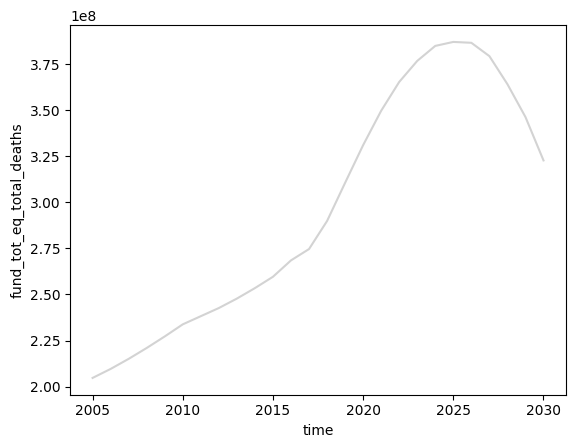

In [ ]:
sns.lineplot(data=mortality_global, 
             x='time', 
             y= 'fund_tot_eq_total_deaths', 
             color='lightgray')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


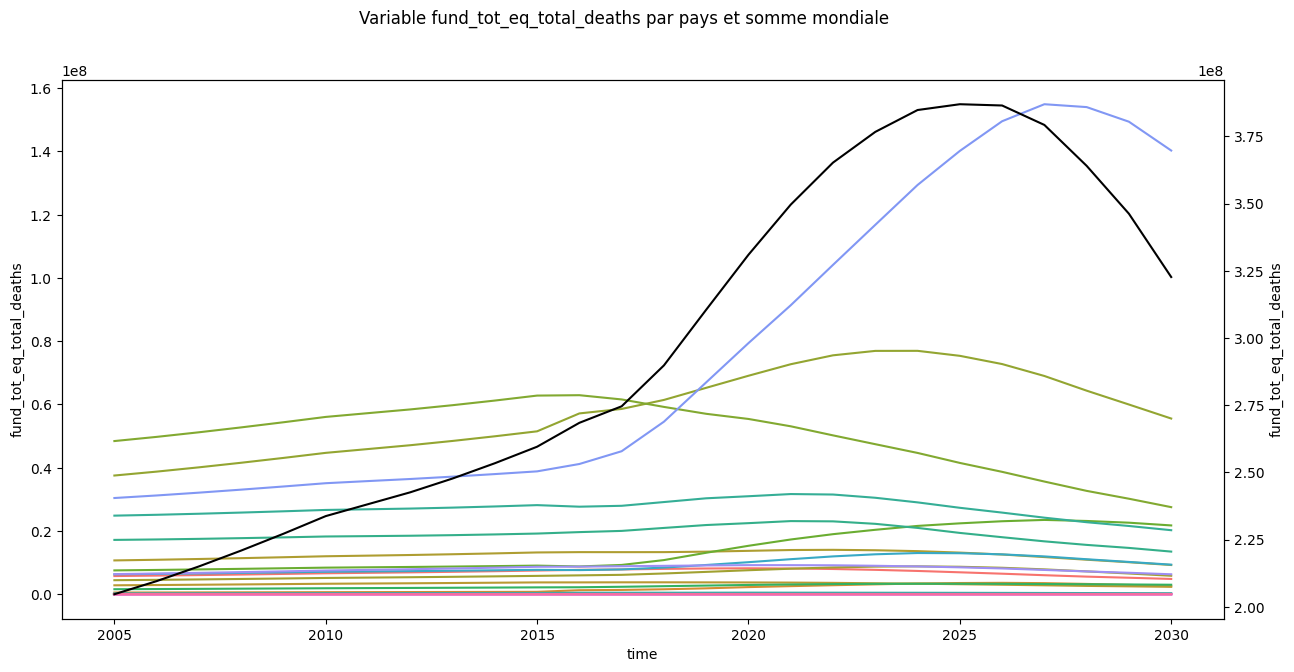

In [ ]:
variable = 'fund_tot_eq_total_deaths'

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

ax.legend(title="Titre")
ax2 = ax.twinx()

sns.lineplot(data=mortality, 
             x='time', 
             y= variable, 
             hue='REGIONS 35 I', 
             color='lightgray',
             ax=ax)

sns.lineplot(data=mortality_global, 
             x='time', 
             y= variable, 
             color='black', 
             ax=ax2)

for axis in [ax, ax2]:
    axis.legend().remove()
    #axis.set_axis_off()
fig.suptitle(f'Variable {variable} par pays et somme mondiale')

plt.show()

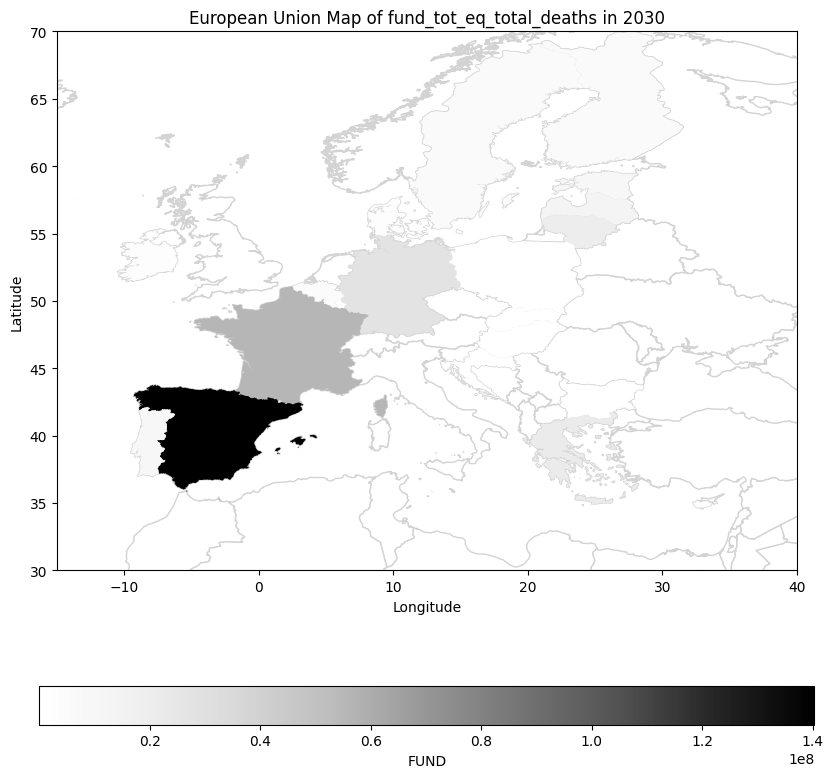

In [ ]:
map_variable(mortality, 2030, 'Greys')

In [ ]:
impact = load_variable_data_from_ds("fund_tot_total_damage", 'results_run_2030.nc')
impact_global = mortality.groupby('time')['fund_tot_total_damage'].sum().reset_index()

KeyError: 'Column not found: fund_tot_total_damage'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


ValueError: Could not interpret value `fund_tot_eq_fund_total_impact` for `y`. An entry with this name does not appear in `data`.

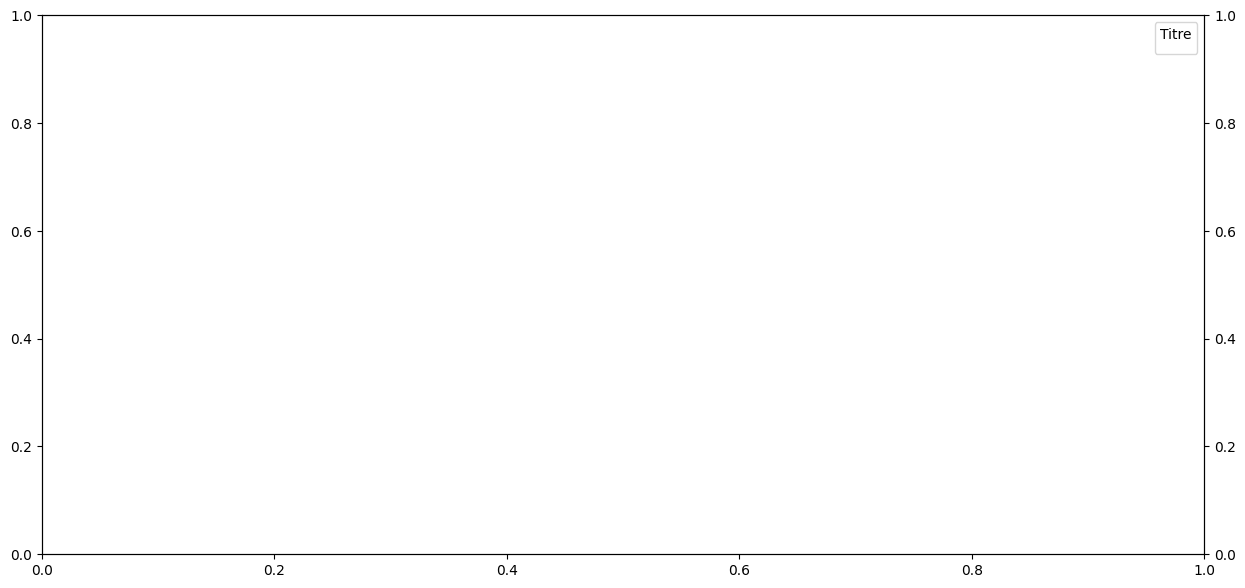

In [ ]:
variable = 'fund_tot_eq_fund_total_impact'

fig, ax = plt.subplots(1, 1, figsize=(15, 7))

ax.legend(title="Titre")
ax2 = ax.twinx()

sns.lineplot(data=, 
             x='time', 
             y= variable, 
             hue='REGIONS 35 I', 
             color='lightgray',
             ax=ax)

sns.lineplot(data=mortality_global, 
             x='time', 
             y= variable, 
             color='black', 
             ax=ax2)

for axis in [ax, ax2]:
    axis.legend().remove()
    axis.set_axis_off()
fig.suptitle(f'Variable {variable} par pays et somme mondiale')

plt.show()